can take any value not just descrete ones 

### PDf:   
probability density function

### Cdf 

Cumulative density function

### Normal Distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1=np.random.normal(20,1,size=100000)
samples_std3=np.random.normal(20,3,size=100000)
samples_std10=np.random.normal(20,10,size=100000)

# Make histograms
plt.hist(samples_std1,bins=100,density=True,histtype='step')
plt.hist(samples_std3,bins=100,density=True,histtype='step')
plt.hist(samples_std10,bins=100,density=True,histtype='step')
# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

<Figure size 640x480 with 1 Axes>

### The Normal CDF
Now that you have a feel for how the Normal PDF looks, let's consider its CDF. Using the samples you generated in the last exercise (in your namespace as samples_std1, samples_std3, and samples_std10), generate and plot the CDFs.

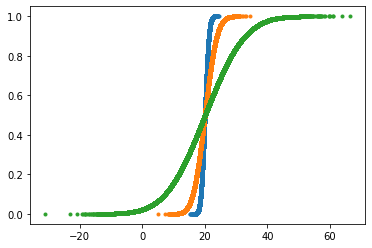

In [2]:
def ecdf(data_list):
    for dt in data_list:
        x=np.sort(dt)
        y=np.arange(1,len(x)+1)/len(x)
        plt.plot(x,y,marker='.',linestyle='none')
    plt.show()
ecdf([samples_std1,samples_std3,samples_std10])

### Exponential distributions

the amount of time between arrival of two poison events is Esp distributed

#### If you have a story, you can simulate it!

Sometimes, the story describing our probability distribution does not have a named distribution to go along with it. In these cases, fear not! You can always simulate it. We'll do that in this and the next exercise.

In earlier exercises, we looked at the rare event of no-hitters in Major League Baseball. Hitting the cycle is another rare baseball event. When a batter hits the cycle, he gets all four kinds of hits, a single, double, triple, and home run, in a single game. Like no-hitters, this can be modeled as a Poisson process, so the time between hits of the cycle are also Exponentially distributed.

How long must we wait to see both a no-hitter and then a batter hit the cycle? The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way, what is the total waiting time for the arrival of two different Poisson processes? The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

Now, you will write a function to sample out of the distribution described by this story.

In [3]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1,size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2,size)

    return t1 + t2